From the json file we created we can now use that to impplement annoy algorithm

In [1]:
pip install annoy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 648.0/648.0 KB 38.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for annoy: filename=annoy-1.17.1-cp38-cp38-linux_x86_64.whl size=582847 sha256=40c69bcca089e587e66dd2b4e4a598d412a2dc07cb4f8f5c5b697f9f04275f33
  Stored in directory: /root/.cache/pip/wheels/f9/93/19/30511c4a9ae6b4937455a134c34a39e13943e2c6f46fcd2ed2
Successfully built annoy


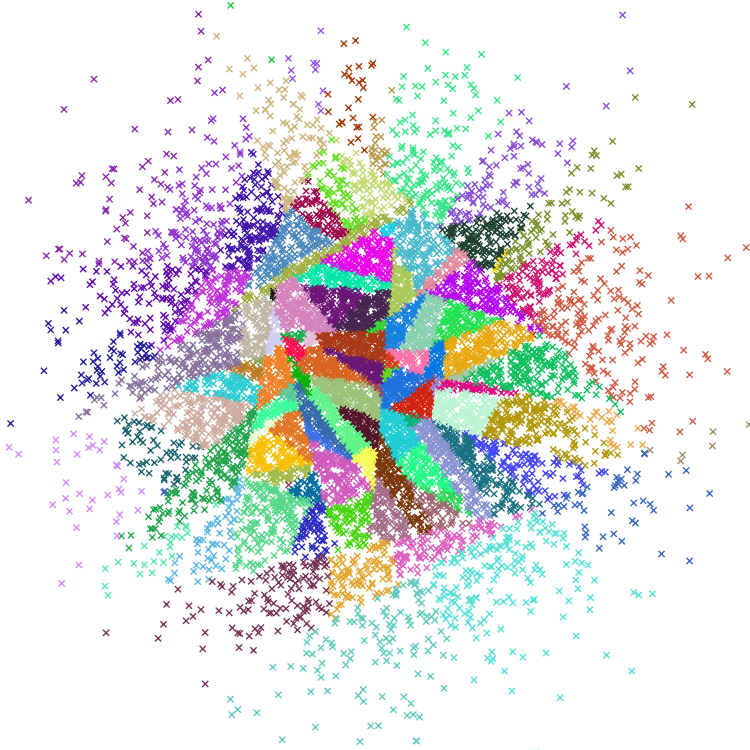

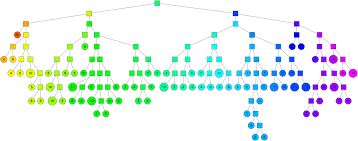

In [3]:
import json
from ast import literal_eval
import pandas as pd

In [8]:
class_labels = pd.read_csv('class_labels_indices.csv')
music_dict = dict(zip(class_labels.index, class_labels.display_name))

In [ ]:
music_dict

In [13]:
with open('music_set.json', 'r') as file:
    file_read = json.loads(file.read())
    music_dataset = literal_eval(file_read)#only work if input is valid

In [15]:
len(music_dataset)

2104

In [ ]:
music_dataset[0]

In [20]:
from annoy import AnnoyIndex

audio_dim = 1280
annoy_index = AnnoyIndex(audio_dim, 'angular')  # Length of item vector that will be indexed, angular is the type of loss function/distance parameter being used
for index in range(len(music_dataset[:1000])):
    vector = music_dataset[index]['data']
    annoy_index.add_item(index, vector)#a.add_item(i, v) adds item i (any nonnegative integer) with vector v. Note that it will allocate memory for max(i)+1 items.

annoy_index.build(50) # 50 treesa.build(n_trees, n_jobs=-1) builds a forest of n_trees trees. More trees gives higher precision when querying. After calling build, no more items can be added. n_jobs specifies the number of threads used to build the trees. n_jobs=-1 uses all available CPU cores.
annoy_index.save('nearest_neightbor_graph.ann')#a.save(fn, prefault=False) saves the index to disk and loads it (see next function). After saving, no more items can be added.

True

In [22]:
annoy_index = AnnoyIndex(audio_dim, 'angular')
annoy_index.load('nearest_neightbor_graph.ann')

True

In [26]:
nns_index = annoy_index.get_nns_by_item(178, 10)#193 is the index and 10 nearest desirable items
#a.get_nns_by_item(i, n, search_k=-1, include_distances=False) returns the n closest items. During the query it will inspect up to search_k nodes which defaults to n_trees * n if not provided. search_k gives you a run-time tradeoff between better accuracy and speed. If you set include_distances to True, it will return a 2 element tuple with two lists in it: the second one containing all corresponding distances.

In [27]:
for index in nns_index:
    sample = music_dataset[index]
    music_labels = [music_dict[idx] for idx in sample['label']]
    print([index, music_labels, sample['video_id'], sample['start_time'], sample['end_time']])

[178, ['Female singing', 'Child singing', 'Music'], b'1hoUEfsTmdE', 30.0, 40.0]
[207, ['Child speech, kid speaking', 'Children playing', 'Music', 'Water'], b'1uhuVsFGe6E', 50.0, 60.0]
[748, ['Singing', 'Female singing', 'Music', 'Inside, large room or hall'], b'B90BOtSOD2Q', 410.0, 420.0]
[972, ['Child speech, kid speaking', 'Child singing', 'Music'], b'eMMDq4-gdA4', 30.0, 40.0]
[378, ['Music', 'New-age music', 'Lullaby'], b'4mwR8H2amsA', 30.0, 40.0]
[570, ['Singing', 'Yodeling', 'Music', 'Song'], b'8hSmQpOPXJE', 50.0, 60.0]
[751, ['Singing', 'Music', 'A capella', 'Song'], b'BaMBwXQwK3g', 30.0, 40.0]
[899, ['Child speech, kid speaking', 'Music', 'Rattle (instrument)'], b'dHOJW7uPZ5g', 20.0, 30.0]
[713, ['Singing', 'Music', 'A capella'], b'At5v5ZZQHmw', 30.0, 40.0]
[553, ['Music', 'Musical instrument', 'Theremin'], b'7XQN9XDnRm4', 80.0, 90.0]


so in the previos cell, what we have done is ,we pick item 178 which is a auio/video of a female singing and has a child like voice or maybe a little girl is singing, so using annoy what we are doing is we are finding 10 closest samples from dataset that captures the features of example 178.
and it is quite evident from the results

In [ ]:
## Use this list for reference of the music types in the dataset
for index in range(len(music_dataset[:1000])):
    sample = music_dataset[index]
    music_labels = [music_dict[idx] for idx in sample['label']]
    print(index, music_labels)

0 ['Stomach rumble', 'Music']
1 ['Speech', 'Animal', 'Horse', 'Neigh, whinny', 'Music']
2 ['Music', 'Theme music']
3 ['Music', 'Theme music', 'Christmas music']
4 ['Finger snapping', 'Music']
5 ['Music', 'Radio']
6 ['Speech', 'Rattle', 'Music']
7 ['Music', 'Radio']
8 ['Music', 'Maraca']
9 ['Speech', 'Oink', 'Music']
10 ['Speech', 'Music', 'Plucked string instrument', 'Guitar', 'Acoustic guitar', 'Tapping (guitar technique)', 'Strum']
11 ['Wedding music']
12 ['Music', 'Musical instrument', 'Steelpan']
13 ['Speech', 'Clip-clop', 'Music']
14 ['Music', 'Classical music', 'Wedding music']
15 ['Music', 'Thunk']
16 ['Speech', 'Music', 'Bang']
17 ['Keyboard (musical)', 'Piano', 'Electric piano', 'Organ', 'Electronic organ']
18 ['Music', 'Middle Eastern music', 'Traditional music']
19 ['Speech', 'Child singing', 'Music']
20 ['Yell', 'Music', 'Blues']
21 ['Music', 'Carnatic music']
22 ['Male singing', 'Female singing', 'Child singing', 'Music']
23 ['Speech', 'Music', "Dental drill, dentist's dri